In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
# CONSTANTS & PARAMETERS
Na = 19                
Nc = 11               
G0 = 1.7              
lab_IP = 8.6          
fy = 10              
J_Er = 1.5 * 10**(-7)
T_ISM = 80
ne = 7.5 * 10**(-3)

# PAH FUNCTIONS
def approx_surface_area_pah(Nc): 
    s_area = 5 * 10**(-16) * Nc
    return s_area

def approx_radius_pah(Nc):
    a = 0.9 * 10**(-8) * np.sqrt(Nc)
    return a

def FUV_absorption_cross_section(Nc):
    sigma = 7 * 10**(-18) * Nc
    return sigma

def UV_absorption_timescale(Nc,G0):
    t_UV = 1.4 * 10**(9) / (Nc*G0)
    return t_UV

def vibrational_degrees_of_freedom(Na):
    return 3*Na - 6

def ionization_potential(Z, Nc):
    IP = 4.4 + (Z + 0.5) * 25.1/np.sqrt(Nc)
    return IP

def photo_el_ionization_rate(Nc, G0, fy):
    J_pe = 2.5 * 10**(-13) * (13.6-lab_IP)**2 * Nc * G0 * fy
    return J_pe

def neutral_fraction(Nc, G0, T_ISM, J_Er, J_Pe, ne):
    # y0 = (J_Pe / J_Er) * np.sqrt(Nc) * G0 * np.sqrt(T_ISM) / ne
    # y1 = 3.5 * 10**(-6) * np.sqrt(Nc) * G0 * np.sqrt(T_ISM) / ne
    # y2 = 1.3 * 10**(-4) * np.sqrt(Nc) * G0 * np.sqrt(T_ISM) / ne
    y4 = (J_Pe / J_Er * ne) 
    #factor = (J_Pe / J_Er) 
    f0 = 1/(1 + y4)
    return f0

# CALCULATIONS
print("Vibrational degrees of freedom:", vibrational_degrees_of_freedom(Na))
print("Surface area:", approx_surface_area_pah(Nc), "cm^2")
print("Radius:", approx_radius_pah(Nc), "cm")
print("FUV cross section:", FUV_absorption_cross_section(Nc), "cm^2")
print("UV absorption timescale:", UV_absorption_timescale(Nc, G0), "seconds", "which is equivalent to ", UV_absorption_timescale(Nc, G0) / 3.154e7, "years")
print("Ionization potential (Z=0):", ionization_potential(0, Nc), "eV", "and the laboratory value for 1-cyanonaphthalene has been measured to be 8.59 - 8.61 eV")
print("Ionization potential (Z=1):", ionization_potential(1, Nc), "eV")
print("Photoelectron ionization rate:", photo_el_ionization_rate(Nc, G0, fy), "electrons s^-1")
print("Neutral fraction:", neutral_fraction(Nc, G0, T_ISM, J_Er, photo_el_ionization_rate(Nc, G0, fy), ne), "which is the ratio of neutral to ionized PAHs")

Vibrational degrees of freedom: 51
Surface area: 5.5e-15 cm^2
Radius: 2.98496231131986e-08 cm
FUV cross section: 7.7e-17 cm^2
UV absorption timescale: 74866310.16042781 seconds which is equivalent to  2.3736940444016428 years
Ionization potential (Z=0): 8.183967374450933 eV and the laboratory value for 1-cyanonaphthalene has been measured to be 8.59 - 8.61 eV
Ionization potential (Z=1): 15.751902123352803 eV
Photoelectron ionization rate: 1.1687500000000001e-09 electrons s^-1
Neutral fraction: 0.9999415659147419 which is the ratio of neutral to ionized PAHs


### Calculating the vibrational & rotational partition functions

In the case of cyanonapthalene, the most likely bond to break in the molecule would be the -CN bond as given by the reaction here:
C10H7CN+ → C10H6+ + HCN + ϵ (where ϵ is the kinetic energy)

In [95]:
# WAVENUMBER DATA
N1cyano_wavenumbers_list = pd.read_csv(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\strong_frequencies_neutral1cyano.csv', header=None).squeeze().tolist()
C1cyano_wavenumbers_list = pd.read_csv(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\strong_frequencies_cation1cyano.csv', header=None).squeeze().tolist()
TS_N1cyano_wavenumbers_list = pd.read_csv(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\transition_strong_frequencies_neutral1cyano.csv', header=None).squeeze().tolist()
TS_C1cyano_wavenumbers_list = pd.read_csv(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\transition_strong_frequencies_cation1cyano.csv', header=None).squeeze().tolist()

# PRINCIPAL MOMENTS OF INERTIA DATA & CONVERSION FACTORS
inertia_factor_amuAng = 1.6605390666000002e-47 # Principal moment of inertia from amu*angstrom^2 to kg*m^2
inertia_factor_au = 1.992851882e-46 # Principal moments of inertia from atomic units to kg*m^2

N1cyano_principal_moments = [341.37767327 * inertia_factor_amuAng, 532.72832397 * inertia_factor_amuAng, 874.10599724 * inertia_factor_amuAng] # Principal moments of inertia in kg*m^2
C1cyano_principal_moments = [341.39046846 * inertia_factor_amuAng, 535.88368599 * inertia_factor_amuAng, 877.27415445 * inertia_factor_amuAng]
TS_N1cyano_principal_moments = [1219.483541 * inertia_factor_au, 960.954403 * inertia_factor_au,  180.43794 * inertia_factor_au] 
TS_C1cyano_principal_moments = [1322.144212 * inertia_factor_au, 337.032003 * inertia_factor_au, 659.17620 * inertia_factor_au]

# CONSTANTS & PARAMETERS
c_cm = 2.99792458e10  # Speed of light in cm/s, since cm_freq is given in cm^-1
h = 6.62607015e-34 # Planck's constant in J/Hz
k_B = 1.380649e-23 # Boltzmann's constant in J/K
symmetry_number = 1 # 1-cyanonaphthalene is structurally asymmetric (also seen in principal moment inertias), so the symmetry number is 1. Also given in sigma notation
T_eval = 1000 # Temperature in K, evaluation of the partition function at 1000 K is done to see how many vibrational states are accessible at this temperature.

# FUNCTIONS
def scale_frequencies(wavenumber_list, scale_factor=0.96):
    return [freq * scale_factor for freq in wavenumber_list]

def vibrational_partition_function(wavenumbers_list, T):
    cm_freqs = np.array(wavenumbers_list)
    hz_freqs = cm_freqs * c_cm
    char_vib_temps = h * hz_freqs / k_B
    q_vibs = 1 / (1 - np.exp(-char_vib_temps / T))
    return np.prod(q_vibs)

def rotational_partition_function(symmetry_number, principal_moments, T):
    return (np.pi**2 / symmetry_number) * \
           np.sqrt(8*np.pi*principal_moments[0] * k_B*T / h**2) * \
           np.sqrt(8*np.pi*principal_moments[1] * k_B*T / h**2) * \
           np.sqrt(8*np.pi*principal_moments[2] * k_B*T / h**2)

def compute_partition_functions(wavenumbers_list, principal_moments, T, symmetry_number=1):
    q_vib = vibrational_partition_function(wavenumbers_list, T)
    q_rot = rotational_partition_function(symmetry_number, principal_moments, T)
    return q_vib, q_rot

# CALCULATIONS
scaled_TS_N_freqs = scale_frequencies(TS_N1cyano_wavenumbers_list, 0.96)
scaled_TS_C_freqs = scale_frequencies(TS_C1cyano_wavenumbers_list, 0.96)

q_vib_N, q_rot_N = compute_partition_functions(N1cyano_wavenumbers_list, N1cyano_principal_moments, T_eval)
q_vib_C, q_rot_C = compute_partition_functions(C1cyano_wavenumbers_list, C1cyano_principal_moments, T_eval)
q_vib_TS_N, q_rot_TS_N = compute_partition_functions(scaled_TS_N_freqs, TS_N1cyano_principal_moments, T_eval)
q_vib_TS_C, q_rot_TS_C = compute_partition_functions(scaled_TS_C_freqs, TS_C1cyano_principal_moments, T_eval)

print("Vibrational partition function (neutral 1-cyanonaphthalene):", q_vib_N, "The rotational partition function (neutral 1-cyanonaphthalene):", q_rot_N)
print("Vibrational partition function (cation 1-cyanonaphthalene):", q_vib_C, "The rotational partition function (cation 1-cyanonaphthalene):", q_rot_C)
print("Vibrational partition function (transition state neutral 1-cyanonaphthalene):", q_vib_TS_N, "The rotational partition function (transition state neutral 1-cyanonaphthalene):", q_rot_TS_N)
print("Vibrational partition function (transition state cation 1-cyanonaphthalene):", q_vib_TS_C, "The rotational partition function (transition state cation 1-cyanonaphthalene):", q_rot_TS_C)

Vibrational partition function (neutral 1-cyanonaphthalene): 5.544077488182599 The rotational partition function (neutral 1-cyanonaphthalene): 5916195.513425924
Vibrational partition function (cation 1-cyanonaphthalene): 25.157890192110596 The rotational partition function (cation 1-cyanonaphthalene): 5944545.396059827
Vibrational partition function (transition state neutral 1-cyanonaphthalene): 61684.14685472909 The rotational partition function (transition state neutral 1-cyanonaphthalene): 283682270.69831663
Vibrational partition function (transition state cation 1-cyanonaphthalene): 341272.7354960699 The rotational partition function (transition state cation 1-cyanonaphthalene): 334352555.04264796


The entropy change is: 110.59798643413164 cal/mol K
The entropy change is: 99.77995440629475 cal/mol K


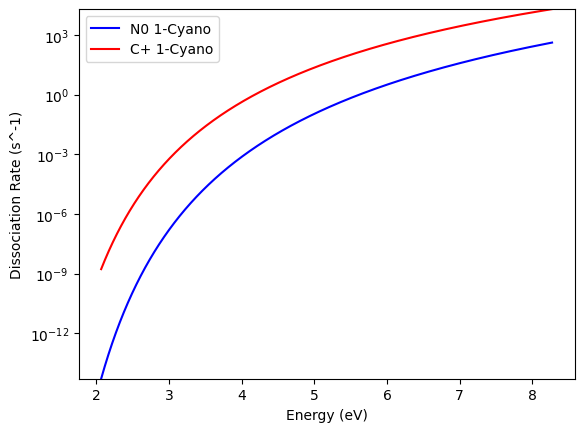

In [96]:
# CONSTANTS & PARAMETERS
h_eV = 4.135667696e-15 # Planck's constant in eV/Hz
k_B = 1.380649e-23 # Boltzmann's constant in J/K
R_gas = 8.31446261815324 # Ideal gas constant in J/(mol*K)
Na = 6.02214076e23 # Avogadro's number in mol^-1
T_eval = 1000 # Temperature in K, evaluation of the partition function at 1000 K is done to see how many vibrational states are accessible at this temperature.
max_photon_frequency = 2.0e15 
min_photon_frequency = 5.0e14 
C_bond_energy = 3.16 # The dissocation/activation energy of the HCN bond of cyanonaphthalene in eV, given in the paper by H. Stockett et al. (2023) DOI: 10.1038/s41557-023-01283-0.
N_bond_energy = 3.66 # Estimate of the activation energy for neutral 1-cyanonaphthalene, recommended by supervisor

# LISTS
k_diss_N_list = [] # List to store the dissociation rates for each frequency
k_diss_C_list = [] # List to store the dissociation rates for each frequency
energies_list = [] # List to store the energies for each frequency
frequency_list = np.logspace(np.log10(min_photon_frequency),np.log10(max_photon_frequency),num=10000) # Arrays of frequencies in Hz,adjust num for resolution

# FUNCTIONS
def d_entropy(q_vib_parent, q_rot_parent, q_vib_transition, q_rot_transition, activation_energy, T):
    delta_S = k_B * np.log((q_vib_transition * q_rot_transition) / (q_vib_parent * q_rot_parent)) + ((activation_energy * 1.602e-19) / T) 
    return delta_S

def PAH_effective_temperature(light_freq, Nc, bond_energy):
    T_eff = 2000 * ((h_eV * light_freq) / Nc) ** 0.4 * (1 - 0.2 * bond_energy / (h_eV * light_freq)) # energies in eV
    return T_eff

def pre_exponential_factor(T_eff, delta_S):
    k0 = k_B * T_eff / h * np.exp(1 + delta_S / R_gas)
    return k0

def unimolecular_dissociation_rate(k0, T_eff, bond_energy):
    k_diss = k0 * np.exp(-bond_energy * 1.602e-19 / (k_B * T_eff)) # energies in eV
    return k_diss

# CALCULATIONS
delta_S_N = d_entropy(q_vib_N, q_rot_N, q_vib_TS_N, q_rot_TS_N, N_bond_energy, T_eval)
delta_S_C = d_entropy(q_vib_C, q_rot_C, q_vib_TS_C, q_rot_TS_C, C_bond_energy, T_eval)
print("The entropy change is:", (delta_S_N * Na / 4.184), "cal/mol K") # Convert to cal/mol K
print("The entropy change is:", (delta_S_C * Na / 4.184), "cal/mol K") # Convert to cal/mol K

for i in frequency_list:
    N_T_eff = PAH_effective_temperature(i, Nc, N_bond_energy)
    C_T_eff = PAH_effective_temperature(i, Nc, C_bond_energy) 
    energies_list.append(h_eV * i) # Append the energy to the list
    
    k0_N = pre_exponential_factor(N_T_eff, delta_S_N)
    k_diss_N = unimolecular_dissociation_rate(k0_N, N_T_eff, N_bond_energy)
    k_diss_N_list.append(k_diss_N) # Append the dissociation rate to the list

    k0_C = pre_exponential_factor(C_T_eff, delta_S_C)
    k_diss_C = unimolecular_dissociation_rate(k0_C, C_T_eff, C_bond_energy)
    k_diss_C_list.append(k_diss_C) # Append the dissociation rate to the list

# PLOTTING
plt.plot(energies_list, k_diss_N_list, label='N0 1-Cyano', color='blue')
plt.plot(energies_list, k_diss_C_list, label='C+ 1-Cyano', color='red')
plt.legend()
plt.ylim(min(k_diss_N_list), max(k_diss_C_list))
plt.xlabel('Energy (eV)')
plt.ylabel('Dissociation Rate (s^-1)')
plt.yscale('log')

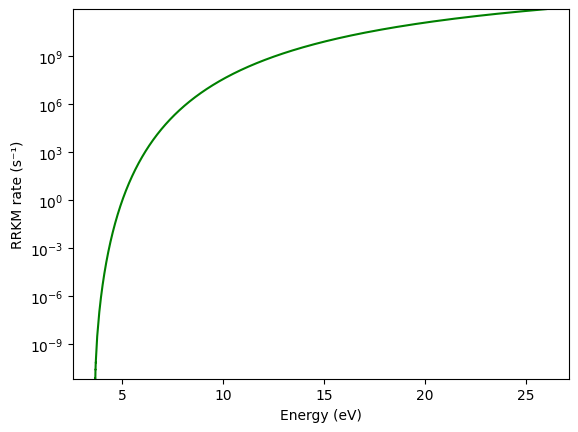

In [98]:
# DENSUM OUTPUT DATA
df1 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\densumout_26eV.out',
    skiprows=115,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

df2 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\TS-1-cyanonaphthalene\vibs\TSdensumout_26eV.out',
    skiprows=114,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

# CONSTANTS & PARAMETERS
h_wavenumber = 4.135667696e-15 * 8065.56 # Planck's constant in eV/cm^-1
E0_cm = 29520                            # Activation energy in cm^-1 (rounded to cm_grain)
cm_to_eV = 1.239841984e-4                
cm_grain = 10

# LISTS
density_of_states_list = df1["Density"].tolist()
TS_sum_of_states_list = df2["Sum"].tolist()
energies_list = df1["E-Emin"].tolist()
k_RRKM_list = []
filtered_energies_list = []

# FUNCTIONS
def RRKM_dissociation_rate(reaction_degen, TS_sum_of_states, density_of_states):
    return (reaction_degen * TS_sum_of_states) / (h_wavenumber * density_of_states)

# CALCULATIONS
for energy, density in zip(energies_list, density_of_states_list):
    if energy <= E0_cm:
        # print("Energy below threshold:", energy)
        continue

    E_available = energy - E0_cm
    #print("E_available:", E_available)
    index = int(E_available / cm_grain)
    # print("Index:", index)

    TS_sum_val = TS_sum_of_states_list[index]
    #print("sum of states:", TS_sum_val, "and density of states:", density)
    k = RRKM_dissociation_rate(reaction_degen=1, TS_sum_of_states=TS_sum_val, density_of_states=density)
    k_RRKM_list.append(k)
    filtered_energies_list.append(energy)

# Converts energies from cm^-1 to eV
filtered_energies_list_eV = [e * cm_to_eV for e in filtered_energies_list]

# PLOTTING
plt.plot(filtered_energies_list_eV, k_RRKM_list, color='green')
plt.xlabel('Energy (eV)')
plt.ylabel('RRKM rate (s⁻¹)')
plt.yscale('log')
plt.ylim(min(k_RRKM_list), max(k_RRKM_list))
plt.show()

In [ ]:
# THE INFRARED RADIATIVE VIBRATIONAL COOLING RATE 

# WAVENUMBER-INTENSITY & DENSUM DATA
df = pd.read_csv('/Users/Mustafa/Documents/GitHub/Project-Cynap/Cynapfolder/Database/neutral1cyano_transitions.tbl', 
                 skiprows=11, 
                 sep='\s+', 
                 names=["UID", "FREQUENCY", "INTENSITY", "SCALE", "SYMMETRY"])

df1 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\densumout_26eV.out',
    skiprows=115,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

df_i = pd.read_csv(
    fr'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\1-cyanonaphthalene\vibs\densum_mode_sweeps\mode_{i}\densum.out',
    skiprows=114,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

# LISTS
A_list = []
k_IR_list = []
wavenumber_list = df["FREQUENCY"].tolist()
intensity_list = df["INTENSITY"].tolist()

def einstein_coefficient(wavenumber, intensity):
    A = (1.2512 * 10**(-7)) * (wavenumber ** 2) * intensity
    return A

def inverse_laplace_dissociation_rate(A_i, DOS_mode_i, DOS_full):
    k_IR = (A_i * DOS_mode_i) / DOS_full
    return k_IR

# CALCULATIONS
for idx, (wavenumber, intensity) in enumerate(zip(wavenumber_list, intensity_list)):
    A = einstein_coefficient(wavenumber, intensity)
    print("Wavenumber:", wavenumber, "cm^-1", "Intensity:", intensity, "Einstein Coefficient:", A, "s^-1")
    A_list.append(A)

for energy, density in zip(energies_list, density_of_states_list):
    if energy <= h*:
        # print("Energy below threshold:", energy)
        continue

    E_available = energy - E0_cm
    #print("E_available:", E_available)
    index = int(E_available / cm_grain)
    # print("Index:", index)

    TS_sum_val = TS_sum_of_states_list[index]
    #print("sum of states:", TS_sum_val, "and density of states:", density)
    k = RRKM_dissociation_rate(reaction_degen=1, TS_sum_of_states=TS_sum_val, density_of_states=density)
    k_RRKM_list.append(k)










In [102]:
# Define internal energy (in eV)
U = 3.0  # or any other value relevant to your study

# Load the DOS data from full densum run
def load_dos(filepath):
    """Reads a Densum output and returns energy (eV) and rho (states/eV)."""
    energies = []
    dos_values = []
    with open(filepath, 'r') as f:
        for line in f:
            if line.strip() and line.split()[0].replace('.', '', 1).isdigit():
                e, rho = map(float, line.strip().split()[:2])
                energies.append(e)
                dos_values.append(rho)
    return np.array(energies), np.array(dos_values)

# Interpolate DOS at target energy
def interpolate_dos(energies, rho, target_U):
    return np.interp(target_U, energies, rho)

# Load full DOS (rho(U))
full_E, full_rho = load_dos(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\densumout_26eV.out')
rho_U = interpolate_dos(full_E, full_rho, U)

# Loop through modes
for i, (wn, intensity) in enumerate(zip(wavenumber_list, intensity_list)):
    A_i = einstein_coefficient(wn, intensity)
    hv = 1.23981e-4 * wn  # convert cm^-1 to eV
    U_shifted = U - hv
    
    # Load rho* for this mode
    mode_path = f"/path/to/densum_mode_sweeps/mode_{i+1}/densum_output.txt"  # change filename if needed
    mode_E, mode_rho = load_dos(mode_path)
    rho_star = interpolate_dos(mode_E, mode_rho, U_shifted)

    # Calculate cooling rate
    k_IR = inverse_laplace_dissociation_rate(A_i, rho_star, rho_U)

    # Save
    A_list.append(A_i)
    k_IR_list.append(k_IR)

# Optional: convert to DataFrame
results_df = pd.DataFrame({
    "Mode": range(1, len(wavenumber_list) + 1),
    "Wavenumber (cm^-1)": wavenumber_list,
    "A_i (s^-1)": A_list,
    "k_IR (s^-1)": k_IR_list
})

results_df.head()


ValueError: could not convert string to float: 'Vibrator:'